In [1]:
from fingerprinting.fingerprinting import fingerPrintBuilder
from fingerprinting.models.encoders import *

builder = fingerPrintBuilder(model = VGGish, checkpoint='checkpoints/vggish/bg_noise/default.ckpt')

/homes/jpmg86/anaconda3/envs/MuMRVQ/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loaded model from checkpoints/vggish/bg_noise/default.ckpt
Target sample rate: 16000
Target number of samples: 16000


In [2]:
fingy,audio = builder.get_audio_fingerprints('data/database_recordings/classical.00004.wav', overlap=0)

In [3]:
data = builder("data/database_recordings","data/database_fingerprints",overlap=0, quantize_q=10000,save=True)

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:19<00:00, 10.40it/s]


In [4]:
from fingerprinting.fingerprinting import audioIdentification

matcher = audioIdentification(model = VGGish,checkpoint='checkpoints/vggish/bg_noise/default.ckpt')

RuntimeError: Error(s) in loading state_dict for ContrastiveFingerprint:
	Missing key(s) in state_dict: "encoder.sequential.0.0.weight", "encoder.sequential.0.0.bias", "encoder.sequential.0.1.weight", "encoder.sequential.0.1.bias", "encoder.sequential.0.1.running_mean", "encoder.sequential.0.1.running_var", "encoder.sequential.1.0.weight", "encoder.sequential.1.0.bias", "encoder.sequential.1.1.weight", "encoder.sequential.1.1.bias", "encoder.sequential.1.1.running_mean", "encoder.sequential.1.1.running_var", "encoder.sequential.2.0.weight", "encoder.sequential.2.0.bias", "encoder.sequential.2.1.weight", "encoder.sequential.2.1.bias", "encoder.sequential.2.1.running_mean", "encoder.sequential.2.1.running_var", "encoder.sequential.3.0.weight", "encoder.sequential.3.0.bias", "encoder.sequential.3.1.weight", "encoder.sequential.3.1.bias", "encoder.sequential.3.1.running_mean", "encoder.sequential.3.1.running_var", "encoder.sequential.4.0.weight", "encoder.sequential.4.0.bias", "encoder.sequential.4.1.weight", "encoder.sequential.4.1.bias", "encoder.sequential.4.1.running_mean", "encoder.sequential.4.1.running_var", "encoder.sequential.5.0.weight", "encoder.sequential.5.0.bias", "encoder.sequential.5.1.weight", "encoder.sequential.5.1.bias", "encoder.sequential.5.1.running_mean", "encoder.sequential.5.1.running_var", "encoder.sequential.6.0.weight", "encoder.sequential.6.0.bias", "encoder.sequential.6.1.weight", "encoder.sequential.6.1.bias", "encoder.sequential.6.1.running_mean", "encoder.sequential.6.1.running_var", "encoder.sequential.7.0.weight", "encoder.sequential.7.0.bias", "encoder.sequential.7.1.weight", "encoder.sequential.7.1.bias", "encoder.sequential.7.1.running_mean", "encoder.sequential.7.1.running_var", "encoder.sequential.8.0.weight", "encoder.sequential.8.0.bias", "encoder.sequential.8.1.weight", "encoder.sequential.8.1.bias", "encoder.sequential.8.1.running_mean", "encoder.sequential.8.1.running_var", "encoder.sequential.9.0.weight", "encoder.sequential.9.0.bias", "encoder.sequential.9.1.weight", "encoder.sequential.9.1.bias", "encoder.sequential.9.1.running_mean", "encoder.sequential.9.1.running_var", "encoder.sequential.10.0.weight", "encoder.sequential.10.0.bias", "encoder.sequential.10.1.weight", "encoder.sequential.10.1.bias", "encoder.sequential.10.1.running_mean", "encoder.sequential.10.1.running_var". 
	Unexpected key(s) in state_dict: "encoder.frontend.mel.spectrogram.window", "encoder.frontend.mel.mel_scale.fb", "encoder.conv1.weight", "encoder.conv1.bias", "encoder.conv2.weight", "encoder.conv2.bias", "encoder.conv3_1.weight", "encoder.conv3_1.bias", "encoder.conv3_2.weight", "encoder.conv3_2.bias", "encoder.conv4_1.weight", "encoder.conv4_1.bias", "encoder.conv4_2.weight", "encoder.conv4_2.bias", "encoder.conv5_1.weight", "encoder.conv5_1.bias", "encoder.conv5_2.weight", "encoder.conv5_2.bias", "encoder.fc6.weight", "encoder.fc6.bias", "encoder.fc7.weight", "encoder.fc7.bias", "encoder.fc8.weight", "encoder.fc8.bias". 

In [ ]:
sim,fingies,topk = matcher("data/query_recordings","data/database_fingerprints",return_ = True, save=False, overlap=0, quantize_q=10000)

100%|██████████| 213/213 [00:02<00:00, 75.64it/s]


In [ ]:
topk['classical.00020-snippet-10-0.wav']

[('classical.00079.wav',
  (FingerPrint([0.0932, 0.0680, 0.3686, 0.2364, 0.1907, 0.2914, 0.2467, 0.1908,
                0.2095, 0.1065, 0.2022]),
   0.3686145544052124)),
 ('classical.00008.wav',
  (FingerPrint([0.1147, 0.2733, 0.1929, 0.1509, 0.1629, 0.1805, 0.3484, 0.1361,
                0.1534, 0.1723, 0.1475]),
   0.34843969345092773)),
 ('classical.00001.wav',
  (FingerPrint([0.0814, 0.1728, 0.1754, 0.1305, 0.0664, 0.1803, 0.3441, 0.0996,
                0.2439, 0.1767, 0.2318]),
   0.3441314697265625))]

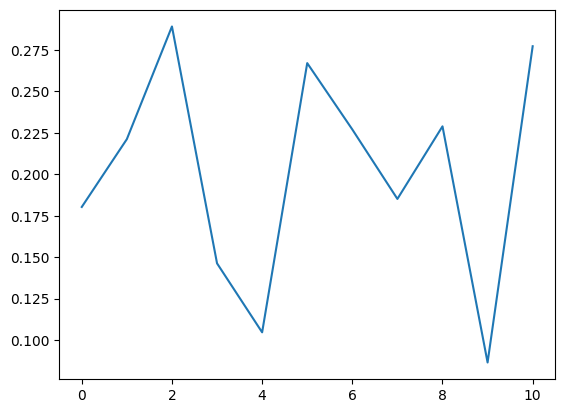

In [ ]:
import matplotlib.pyplot as plt
same_sim = sim['classical.00020-snippet-10-0.wav']['classical.00099.wav']
plt.plot(same_sim[0].numpy())

In [ ]:
matcher.evaluate("data/query_recordings","data/database_fingerprints",top_k=3, overlap=0)

100%|██████████| 213/213 [00:02<00:00, 78.35it/s]


Recall@3
torch.Size([42600])
torch.Size([42600])
torch.Size([42600])
Precision@3
torch.Size([42600])
torch.Size([42600])
torch.Size([42600])
AUROC
torch.Size([42600])
torch.Size([42600])
torch.Size([42600])
MAP
torch.Size([42600])
torch.Size([42600])
torch.Size([42600])
HitRate@3
torch.Size([42600])
torch.Size([42600])
torch.Size([42600])


{'Recall@3': tensor(0.0469),
 'Precision@3': tensor(0.0156),
 'AUROC': tensor(0.6092),
 'MAP': tensor(0.0593),
 'HitRate@3': tensor(0.0469)}